[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/KingaS03/Mathematics-for-Machine-Learning-and-Data-Science/master)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/KingaS03/Mathematics-for-Machine-Learning-and-Data-Science)

<[ Linear Algebra ](LinearAlgebra.ipynb)|[ Statistics and PCA ](PCA.ipynb)>

# 3. Calculus & Numerical Analysis

Agenda
- differentiation of univariate functions
- rules of differentiation
- differentiation of multivariate functions (the Jacobian, the Hessian)
- chain rule for univariate and multivariate functions 
- the Taylor approximation
- the Newton-Raphson method
- gradient descent method
- Newton's method
- backpropagation
- the method of Lagrange multipliers


## 3.1. Motivation
Find the optimal value of the model parameters of a neural network.

## 3.2. Functions
A function $f:A \to B$ associates to each element of the set $A$ an element of the set $B$.

For our future context $A = \mathbb{R}^n$ and $B = \mathbb{R}^m$ for some natural numbers $n$ and $m$.

**Exercise**

1. To plot a function $f: \mathbb{R} \to \mathbb{R}$ you can plug in the following code the formula of the function $f$ and execute the code.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math
 
def f(x):
    return math.cos(x) #formula of the function to be plotted

# define input data
inputs = np.linspace(-10, 10, num=50) 
# calculate outputs
outputs = [f(x) for x in inputs]
# plot inputs vs outputs
plt.plot(inputs, outputs)
plt.show()

Plot the functions:
$$\begin{array}{llll}
a)\ f(x) = x^2 & b)\ f(x) = x^3 & c)\ f(x) = x^5 - 3x^4 + 2x & d)\ f(x) = \sin(x) \\
e)\ f(x) = \cos(x) & f)\ f(x) = e^x & g)\ f(x) = \ln(x) & h)\ f(x) = \sqrt{x}
\end{array}$$

**Remark**

In $\mathbb{R}^3$ a 2-dimensional surface parametrised by $(x,y)$ can be plotted using the below code. You see two solutions below also for giving a hint about the function value associated to the parameters $(x,y)$.

<IPython.core.display.Javascript object>


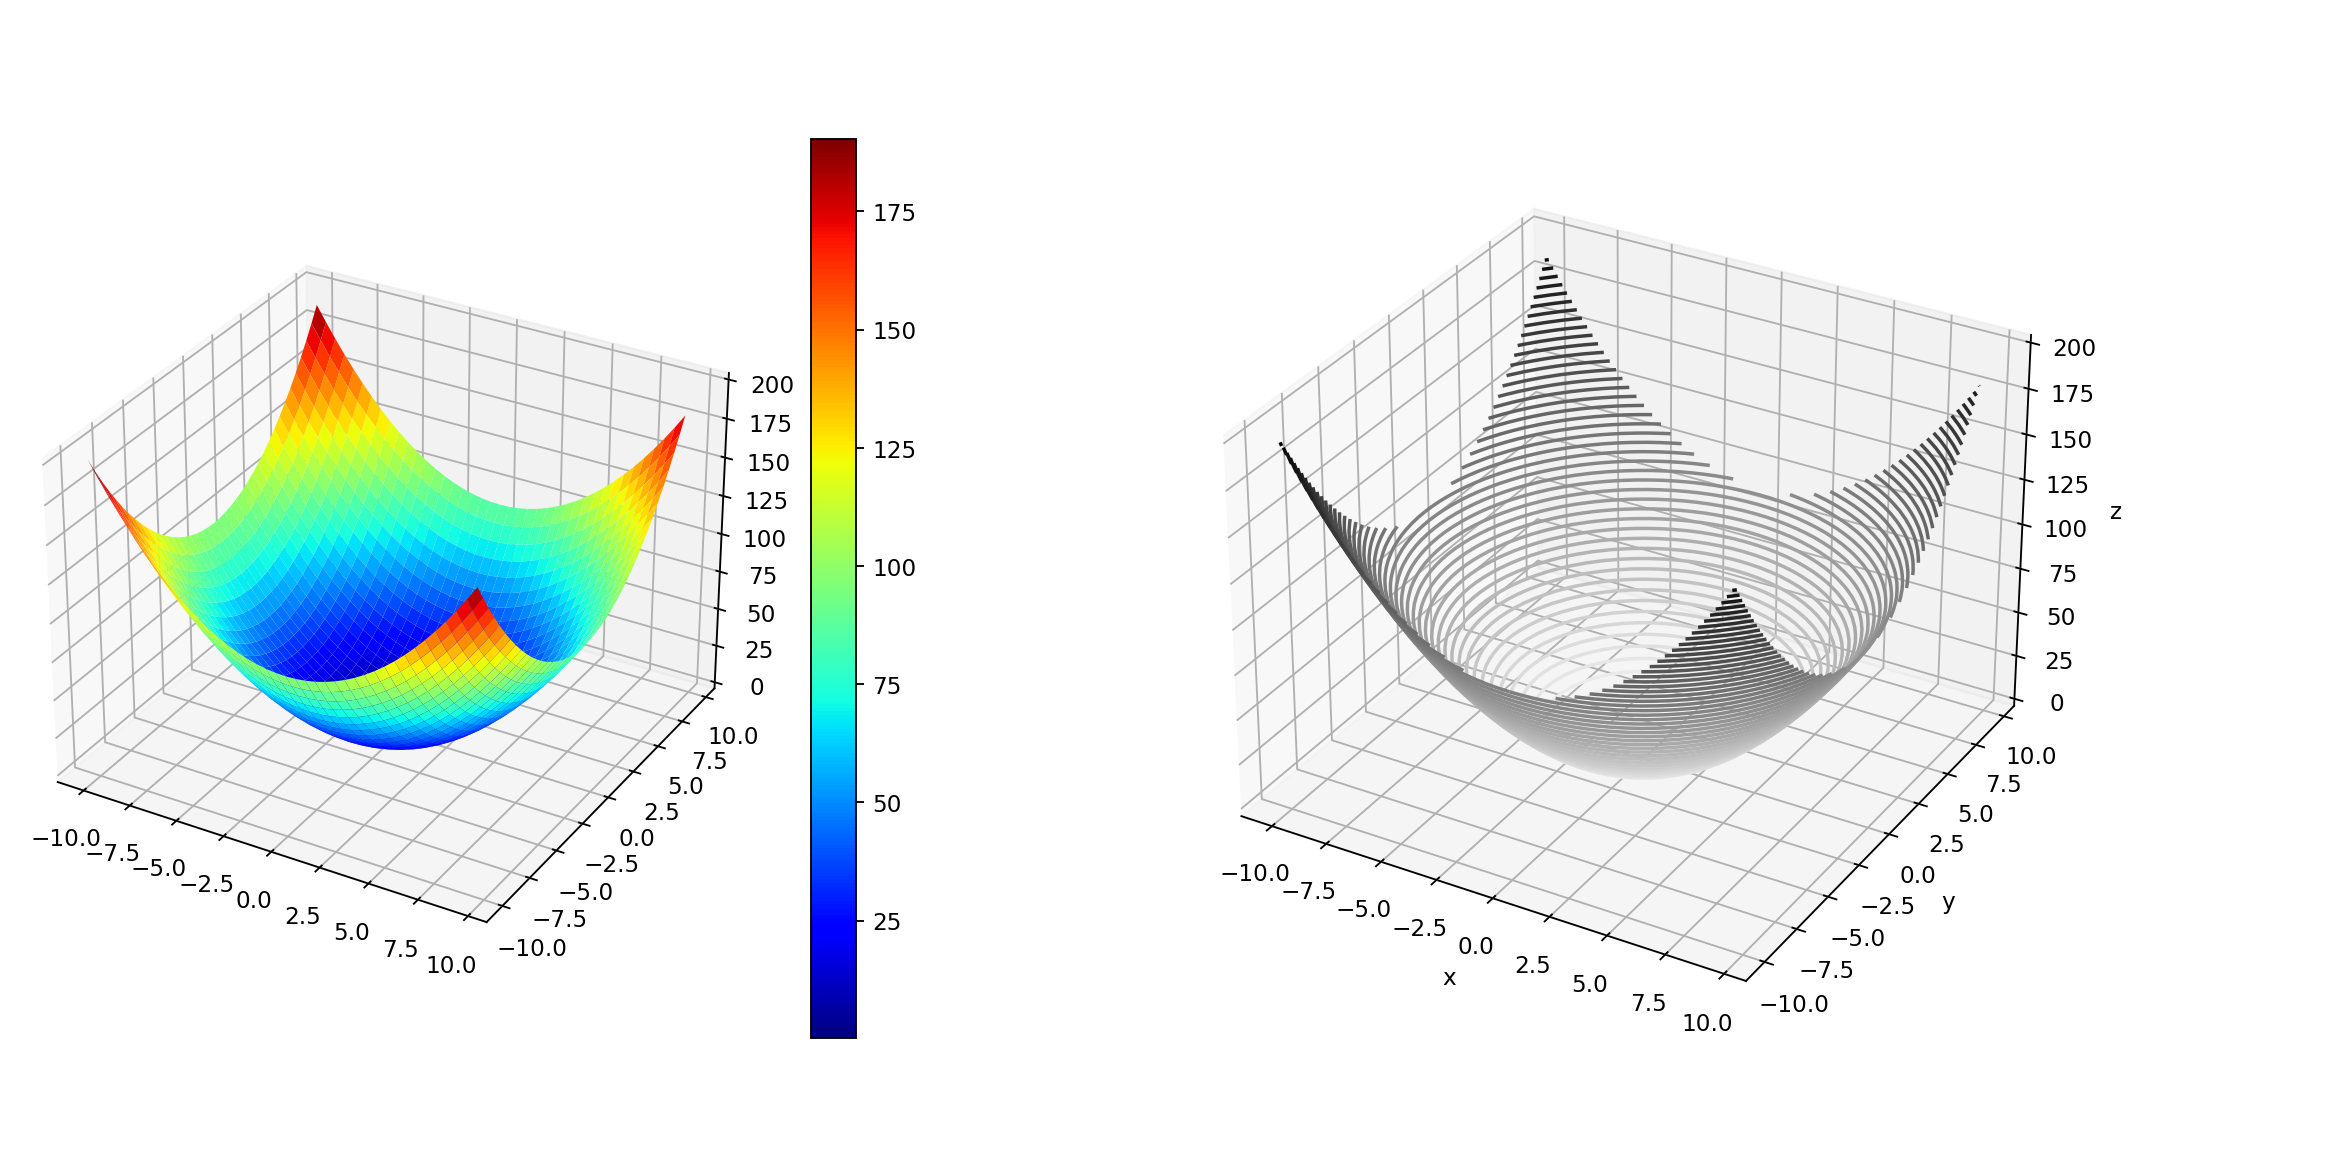

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np

x = np.arange(-10, 10, 0.5)
y = np.arange(-10, 10, 0.5)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 #here comes the formula describing the height associated to the point (X,Y) in the parameter space

fig = plt.figure(figsize = (14, 7))

#first subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.jet, linewidth=0)
fig.colorbar(surf)

#fig.tight_layout()

#second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

### 3.2.1. Differentiation of a univariate function
----------------------------
**Definition of the derivative of a univariate function**<br>

For a function $f:\mathbb{R} \to \mathbb{R}$ we would like to characterise its local linear behaviour. Therefore we take two points $x$ and $x+\Delta x$ and their corresponding values $f(x)$ and $f(x+\Delta x)$. We are connecting these points by a line and we will calculate the gradient of this line

$$m = \frac{\Delta f}{\Delta x} = \frac{f(x+\Delta x)-f(x)}{(x+\Delta x) - x} = \frac{f(x+\Delta x)-f(x)}{\Delta x}$$

Now we are going to take smaller and smaller values for the increment $\Delta x$. We define the derivative of $f$ in point $x$ as the value of the above quotient when $\Delta x$ is getting infinitesimally small.

In mathematical formalism the definition of the first order derivative of $f$ looks in the following way:

$$f'(x) = \lim\limits_{\Delta x \to 0} \frac{f(x+\Delta x)-f(x)}{\Delta x}$$

-------------------

In [4]:
from IPython.display import IFrame

IFrame("https://www.geogebra.org/classic/enyhcvgw", 1100, 900)

### 3.2.2. Differentiation rules 

Observe that the above defined derivative satisfies the following properties:

0. constant rule: $c' = 0$, for any constant $c \in \mathbb{R}$ 

1. constant mutiple rule: $(cf(x))' = c f'(x)$, where $c \in \mathbb{R}$ 

2. sum and difference rule: $(f(x) \pm g(x))' = f'(x)\pm g'(x)$

3. product rule: $(f(x) \cdot g(x))' = f'(x)g(x) + f(x)g'(x)$

4. power rule: $\left(x^r\right)' = r x^{r-1}$, where $r \in \mathbb{R}\setminus\{0\}$

5. exponential derivative: $(e^x)' = e^x$, $(a^x)' = ln(a) a^x$, where $a \in (0,\infty) \setminus\{1\}$

6. logarithm derivative: $(\ln(x))' = \frac{1}{x}$, $\log_a(x) = \frac{1}{\ln(a)x}$, where $a \in (0,\infty) \setminus\{1\}$ and $x \neq 0$

7. trigonometric derivatives: $(\sin(x))' = \cos(x)$, $(\cos(x))' = -\sin(x)$, 

8. chain rule: $\left(f(g(x))\right)' = f'(g(x)) \cdot g'(x)$

<!-- <center>
<img src="Images/DifferentiationRules.png" width="500"> 
</center>-->


-------------------
**Exercise:**

<p stype = "padding-bottom: 0.5cm"> 1. Plot the following functions together with their first order derivatives:
$$\begin{array}{llll}
a)\ f(x) = x^2 & b)\ f(x) = x^3 & c)\ f(x) = x^5 - 3x^4 + 2x & d)\ f(x) = \sin(x) \\
e)\ f(x) = \cos(x) & f)\ f(x) = e^x & g)\ f(x) = \ln(x) & h)\ f(x) = \sqrt{x}
\end{array}$$</p>

<p stype = "padding-bottom: 0.5cm"> 2. Consider the following functions and calculate their requested derivatives:
\begin{align*}
&(1)\quad f(x) = x^3 - 3x + 1 + \frac{1}{x}, \ f'(x) = ?, f'(1) = ?\\[0.5em]
&(2)\quad f(x) = e^x + 2\sin(x) + x^3,\ f''(x) = ?, f''(0) = ?\\[0.5em]
&(3)\quad f(x) = \sqrt{x},\ f''(x) = ?, f'(1) = ?\\[0.5em]
&(4)\quad f(x) = \frac{\sin(3x^4 + 2x)}{a^x},\ f'(x) = ?, f'(0) = ?\\[0.5em]
&(5)\quad f(x) = e^{x^2-3},\ f'(x) = ?, f'(0) = ?\\[0.5em]
&(6)\quad f(x) = \frac{\sin(x)}{\cos(x)},\ f'(x) = ?, f'(\pi) = ?
\end{align*}</p>


### 3.2.3. Differentiation of multivariate functions

-------------
**Definition of the partial derivative**

When the function $f:\mathbb{R}^n \to \mathbb{R}$ depends on more variables $x_1, x_2, \ldots, x_n$ and it is nice enough, we can calculate its partial derivatives w.r.t. each variable. The partial derivative of the function $f$ in a point $x^* =(x_1^*, x_2^*, \ldots, x_n^*)$ w.r.t. the variable $x_1$ can be calculated by fixing the values of the other parameters to be equal to $x_2^*, \ldots, x_n^*$ and differentiating the so resulting function by its only parameter $x_1$.

To describe the formula in a mathematically exact way let us consider the function $g: \mathbb{R} \to \mathbb{R}$ defined by the formula 

$$g(x_1) = f(x_1, x_2^*, \ldots, x_n^*)$$

Then the partial derivative of $f$ w.r.t. $x_1$ is denoted by $\displaystyle\frac{\partial f}{\partial x_1}$ and is equal to the derivative of $g$ in the point $x_1^*$, that is

$$\frac{\partial f}{\partial x_1}(x_1^*,, x_2^*, \ldots, x_n^*) = g'(x_1^*) = \lim_{\Delta x_1^* \to 0} \frac{g(x_1^* + \Delta x_1) - g(x_1^*)}{\Delta x_1} = \lim_{\Delta x_1 \to 0}\frac{f(x_1^* + \Delta x_1, x_2^*, \ldots, x^*_n) - f(x_1^*, x_2^*, \ldots, x^*_n)}{\Delta x_1}$$

---------------

Alternatively we can use for this partial derivative also other notations, like the shorter 

$$\frac{\partial f}{\partial x_1}(x^*) \quad \mbox{or} \quad \partial_{x_1} f(x^*)$$

When it is clear that we are performing our calculations in the point $x^*$ and there is no source for confusion, we can omit $x^*$ also and work just with 

$$\frac{\partial f}{\partial x_1} \quad \mbox{or} \quad \partial_{x_1} f$$

We can proceed similarly in the case of the other variables to calculate all partial derivatives

$$\frac{\partial f}{\partial x_2}(x^*), \quad \frac{\partial f}{\partial x_3}(x^*), \quad \ldots \quad, \frac{\partial f}{\partial x_n}(x^*)$$

-------------
**Definition of the Jacobian**

The row vector of all partial derivatives is called the **gradient** of the function or the **Jacobian** of it, that is

$$ \nabla f (x^*) = \left( \frac{\partial f}{\partial x_1} (x^*), \frac{\partial f}{\partial x_2}(x^*), \ldots \frac{\partial f}{\partial x_n}(x^*)\right)$$

------------------

**Remark**

The vectors $\left(\begin{array}{l}
1\\
0\\
0\\
\vdots\\
0\\
\frac{\partial f}{\partial x_1} (x^*)
\end{array}\right), \left(\begin{array}{l}
0\\
1\\
0\\
\vdots\\
0\\
\frac{\partial f}{\partial x_2} (x^*)
\end{array}\right), \ldots, \left(\begin{array}{l}
0\\
0\\
\vdots\\
0\\
1\\
\frac{\partial f}{\partial x_n} (x^*)
\end{array}\right) \in \mathbb{R}^{n+1}$ span the tangent space of the surface described by the parametrisation $f: \mathbb{R}^n \to \mathbb{R}$.

With the below applet you can get a visual understanding of the tangent space to a surface given by a parametrisation $f: \mathbb{R}^2 \to \mathbb{R}$ and its relation to the parial derivatives of the function.

* You can enter a function of two variables. 

* You can turn on and off the following things: 

    * the graph of f; 

    * the intersection with planes that have a fixed $x$ or $y$ coordinate (i.e. the restriction of $f(x,y)$ to $f(x^*,y)$ or $f(x,y^*)$); 

    * the tangents to these curves (the slopes of these lines are the partial derivatives); 

    * the tangent plane (the plane that contains the two tangent lines). 

* You can move the point you are interested in by either using the sliders, or by dragging the point labelled A.

In [ ]:
IFrame("https://www.geogebra.org/classic/gmwuqfvx", 1200, 800)

**Further generalisation of the Jacobian**

For a function $f: \mathbb{R}^n \to \mathbb{R}^m$ having also a multivariate output, we can take each output and calculate its partial derivative w.r.t. each input variable $x_1, x_2, \ldots, x_n$. 

Let us introduce the $f_1, f_2, \ldots, f_m: \mathbb{R}^n \to \mathbb{R}$ notations for the components of the output of $f$, i.e. 

$$f: x = \left(
\begin{array}{c}
x_1\\
x_2\\
\vdots\\
x_n
\end{array}
\right) \in \mathbb{R}^n \mapsto \left(
\begin{array}{c}
f_1(x)\\
f_2(x)\\
\vdots\\
f_m(x)
\end{array}
\right)$$

For the first output $f_1$ we will have $n$ partial derivatives, i.e.

$$\frac{\partial f_1}{\partial x_1}(x^*), \quad \frac{\partial f_1}{\partial x_2}(x^*), \quad \ldots \quad, \frac{\partial f_1}{\partial x_n}(x^*)$$

And for each output the same will happen. We will organise these partial derivatives in a matrix in such a way that in the $i$th row the derivatives of $f_i$ will be enlisted, and at the intersection of $i$th row and $j$th column the partial derivative 

$$\frac{\partial f_i}{\partial x_j}(x^*)$$

will be stored.

This way we obtain the matrix

$$\displaystyle\nabla f (x^*) = \left(
\begin{array}{cccc}
\frac{\partial f_1}{\partial x_1}(x^*) & \frac{\partial f_1}{\partial x_2}(x^*) & \cdots & \frac{\partial f_1}{\partial x_n}(x^*)\\
\frac{\partial f_2}{\partial x_1}(x^*) & \frac{\partial f_2}{\partial x_2}(x^*) & \cdots & \frac{\partial f_2}{\partial x_n}(x^*)\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial f_m}{\partial x_1}(x^*) & \frac{\partial f_m}{\partial x_2}(x^*) & \cdots & \frac{\partial f_m}{\partial x_n}(x^*)
\end{array}
\right)$$

This matrix is called the Jacobian of the function $f$. 

Sometimes for the notation of the above Jacobian matrix the $\nabla_x$, $\frac{\partial f}{\partial x}$ or $\partial_x f$ notations are also used. These latter notations are preferred when the function $f$ might depend on other variables as well and we would like to emphasize w.r.t. which variables do we consider the Jacobian.

-----------------
**Exercise**

The supervisor of a building site has dropped their mobile phone into a pit with an uneven floor, and it has rolled to the lowest point. To make matters worse, the pit has subsequently been filled with sand such that the phone is covered and cannot be seen. To find where in the pit their phone is, the supervisor has crafted a ‘dip-stick’ with a head designed to measure the slope of the floor if it is poked straight down through the sand.

Find the phone of the supervisor by clicking on different spots in the sand.

In the first exercise you will receive information just about the depth of the whole.

In the second exercise you will receive information also about the gradient of the depth function.

<IPython.core.display.Javascript object>


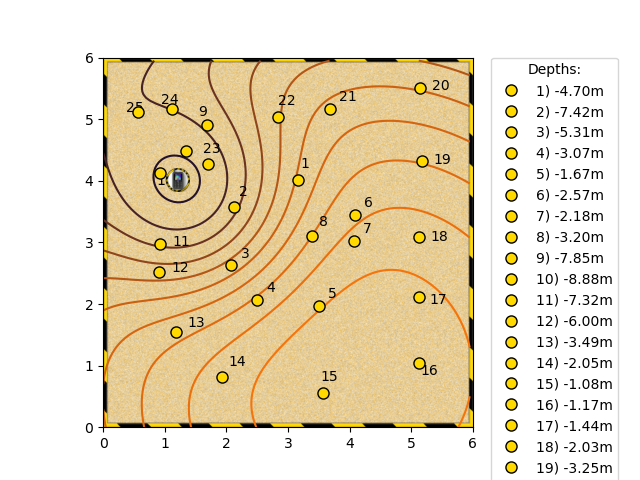

Output()

In [5]:
%run "readonly/sandpit-exercises.ipynb"
sandpit_depth_only()

<IPython.core.display.Javascript object>


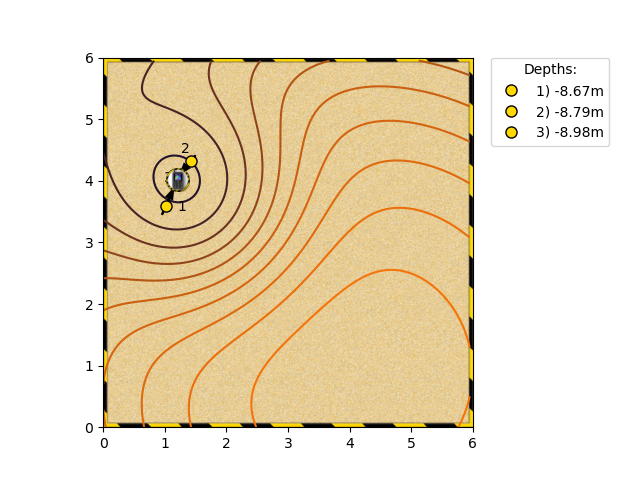

Output()

In [6]:
%run "readonly/sandpit-exercises.ipynb"
sandpit_intro()

<IPython.core.display.Javascript object>


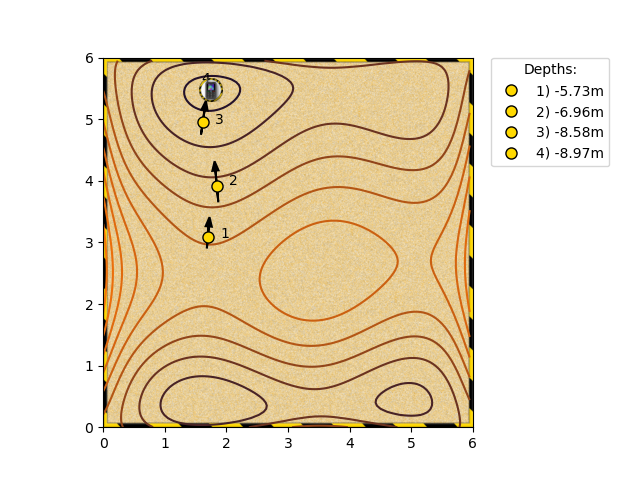

Output()

In [7]:
%run "readonly/sandpit-exercises.ipynb"
sandpit_random()

There are multiple wholes in the sandpit. The phone is in the deepest one. Try to find it.

<IPython.core.display.Javascript object>


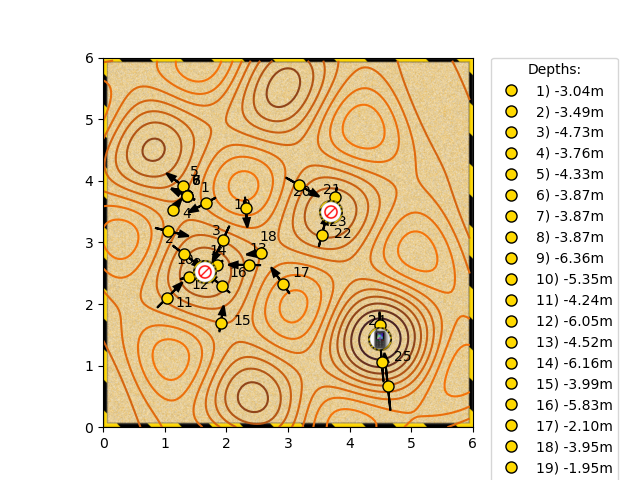

Output()

In [8]:
%run "readonly/sandpit-exercises.ipynb"
sandpit_multiple_minima()

There is a deep but narrow well that the phone may have fallen into. See if you can find the phone in this case.

<IPython.core.display.Javascript object>


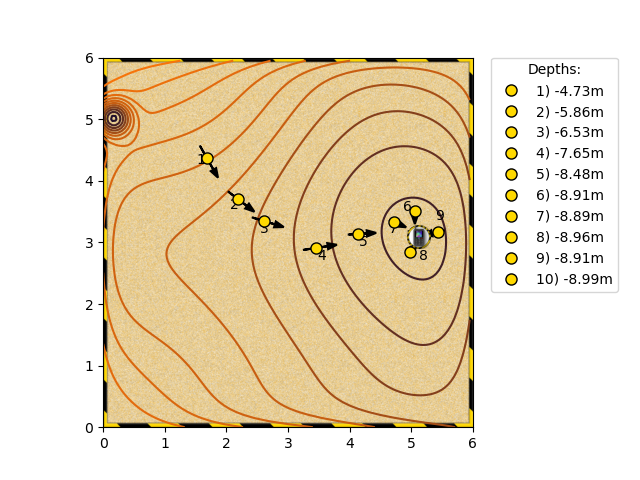

Output()

In [9]:
%run "readonly/sandpit-exercises.ipynb"
sandpit_well()

---------------

### 3.2.4. Multivariate chain rule


Having introduced the Jacobian, we can formulate the multivariate chain rule. 

-------------
**The multivariate chain rule**

For two functions $f: \mathbb{R}^n \to \mathbb{R}^k$ and $g: \mathbb{R}^m \to \mathbb{R}^n$ consider the composite function $f \circ g: \mathbb{R}^m \to \mathbb{R}^k$. 

<center>
<img src="Images/Composite_Function.png" width="250"> 
</center>

The Jacobian of the composite function $f \circ g$ in the point $x^*$ is:

$$(\nabla f \circ g) (x^*) = (\nabla f)(g(x^*)) \cdot (\nabla g)(x^*)$$


--------------------

**Exercise**

(1) Calculate the gradient of the function $f(x, y, z) = \cos(z) \cdot e^{y^2 \cdot x}.$

(2) Calculate the partial derivatives of $f(x,y,z) = x^2y+y^2z+z^2x$.

(3) For $f(x,y)=yx,\ x(t)=t,\ y(t)=sin⁡(t)$ calculate $\frac{\partial f(x(t), y(t))}{\partial t} = \nabla_t f(x(t),y(t))$.

(4) For $f(x,y,z)=\cos(z)e^{y^2 x},\ x(t)=t-1,\ y(t)=t+1,\ z = t^2$ calculate $\frac{\partial f(x(t), y(t), z(t))}{\partial t} = \nabla_t f(x(t),y(t),z(t))$.

(5) Calculate the Jacobian of $f(x,y,z) = x^2+3e^ye^z+cos(x)sin(z)$.

(6) Calculate the Jacobian of the function $f(x,y)= (\underbrace{x^2-y^2}_{f_1(x,y)}, \underbrace{2xy}_{f_2(x,y)})$.

(7) Calculate the Jacobian of $f \circ g$, where $f(x_1,x_2)=x_1^2\cdot x_2^2 + x_1\cdot x_2$ and $g(t) = (\underbrace{1-t^2}_{g_1(t)}, \underbrace{1+t^2}_{g_2(t)})$

(8) Calculate the Jacobian of $f \circ g \circ h$, where 

\begin{align*}
&f(x_1,x_2)=x_1^2−x_2^2,\\[0.5em]
&g(u_1,u_2)=(\underbrace{2u_1+3u_2}_{g_1(u_1,u_2)}, \underbrace{2u_1-3u_2}_{g_2(u_1,u_2))})\\[0.5em]
&h(t) = (\underbrace{\cos(t/2)}_{h_1(t)}, \underbrace{\sin(2t)}_{h_2(t)})
\end{align*}

-------------

### 3.2.5. Higher order differentials (uni- and multivariate case)

-------
**Definition of higher order differentials / derivatives**

For a function $f: \mathbb{R}\to \mathbb{R}$ we can calculate its derivative in each point, this means that the derivative $f'$ of the function is again a function mapping each point $x \in \mathbb{R}$ to the derivative $f'(x)$.

Now we can differentiate again the first order derivative $f'$ and as such we obtain the second order derivative, i.e.

$$f''(x) = \lim\limits_{\Delta x \to 0}\frac{f'(x+\Delta x) - f'(x)}{\Delta x}$$

The second order derivative can be again differentiated and this way we obtain the third order derivative of a function denoted by $f'''$ or $f^{(3)}$.

The $n$th order derivative of a function $f: \mathbb{R}\to \mathbb{R}$ in the point $x$ is denoted by $f^{(n)}(x)$ if it exists.

-------------------
**Multivariate case**

We extend the notion of second order derivative to a function $f: \mathbb{R}^n \to \mathbb{R}$.

Consider as starting point the Jacobian of the function (which corresponds to the derivative from the univariate case). Let us calculate all partial derivatives of the first order partial derivatives of the gradient function

$$\nabla f = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots \frac{\partial f}{\partial x_n}\right),$$

and organize them in the following way in a matrix

$$\nabla^2 f = \left(
\begin{array}{cccc}
\frac{\partial^2 f}{\partial x_1\partial x_1} & \frac{\partial^2 f}{\partial x_1\partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1\partial x_n} \\
\frac{\partial^2 f}{\partial x_2\partial x_1} & \frac{\partial^2 f}{\partial x_2\partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_2\partial x_n} \\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial^2 f}{\partial x_n\partial x_1} & \frac{\partial^2 f}{\partial x_n\partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n\partial x_n} 
\end{array}
\right)$$

then the resulting matrix is called the **Hessian matrix**.

-----------

The value of the Hessian matrix can be used 

- to derive better local approximation for a function than the linear one,
- to find out whether a critical point is a minimum or maximum point or saddle point.

## 3.3. Applications of the differentials

### 3.3.1. The Taylor series approximation

In the below GeoGebra app the Taylor approximations of order $n$ of the $\sin$ function around the point $x_0$ are visualised. You can change $x_0$ and $n$ on the sliders. You can change the function by typing in the bottom "Input..." field of the app $f(x) = x^2/(x+1)$ for example.

In [10]:
IFrame("https://www.geogebra.org/classic/kc2umqak", 1000, 800)

--------------
**Definition of the Taylor polynomial of order $n$**

The Taylor polynomial of an $n$-times differentiable function $f:\mathbb{R} \to \mathbb{R}$ in a point $x_0$ is the polynomial $p$ of order $n$, for which it holds that

$$\left\{
\begin{align*}
f(x_0) &= p(x_0)\\
f'(x_0) &= p'(x_0)\\
f''(x_0) &= p''(x_0)\\
\vdots\\
f^{(n)}(x_0) &= p^{(n)}(x_0)
\end{align*}\right.$$

-------
**Remark**<br>
1. Observe that the Taylor polynomial is uniquely defined and it is given by the following formula

$$p(x) = \frac{f(x_0)}{0!} + \frac{f'(x_0)}{1!}(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + \cdots + \frac{f^{(n)}(x_0)}{n!} (x-x_0)^n$$

Where $0! = 1$ by convention.

2. If the function is nice enough, then the approximation error $f(x) - p(x)$ is of the magnitude of $(x-x_0)^{n+1}$.

---------------------------

**The Taylor approximation of a multivariate function**<br>
For a function $f: \mathbb{R}^n \to \mathbb{R}$ the Taylor approximation of order 1 is

$$l(x) = \frac{f(x_0)}{0!} + \frac{\nabla f(x_0)}{1!}\cdot (x-x_0),$$

where $\nabla f(x_0)$ denotes the Jacobian of the function in point $x_0$ and this row vector is multiplied by the column vector $x-x_0$ in the above formula.

For a function $f: \mathbb{R}^n \to \mathbb{R}$ the Taylor approximation of order 2 is

$$q(x) = \frac{f(x_0)}{0!} + \frac{1}{1!}\nabla f(x_0)\cdot (x-x_0) + \frac{1}{2!} (x-x_0)^T \cdot \nabla^2 f(x_0) \cdot (x-x_0),$$

where $\nabla^2 f(x_0)$ denotes the Hessian of the function in point $x_0$ and this matrix  is multiplied from left by the row vector $(x-x_0)^T$ and from the right by the column vector $x-x_0$ in the above formula.

------------------------

**Remark**<br>
The gradient or Jacobian of the function $f$ has the following two properties, which are crucial for our forthcoming applications:
- in a fixed point $x =(x_1, x_2, \ldots, x_n)$ the gradient / Jacobian $\nabla f$ points up the hill along the steepest direction
- its length is proportional to the steepness.

*Proof*<br>
In case of a univariate function $f:\mathbb{R} \to \mathbb{R}$, in the proximity of a chosen point $x$, i.e. in $x+\Delta x$, the best linear approximation of the function $f$ is given by

$$f(x+\Delta x) \simeq f(x) + f'(x) \Delta x $$

Therefore the total change of the function $f(x + \Delta x) - f(x)$ can be approximated by $f'(x) \Delta x$.

Similarly in case of a multivariate function $f: \mathbb{R}^n \to \mathbb{R}$ the total change around a point $x$ can be approximated by $\langle \nabla f(x),\Delta x\rangle = \nabla f(x) \cdot \Delta x$, where $\Delta x$ is an element of the tangent space of the surface at the point $x$ expressed w.r.t. the basis $\displaystyle\frac{\partial f(x)}{\partial x_1}, \frac{\partial f(x)}{\partial x_2}, \ldots, \frac{\partial f(x)}{\partial x_n}$. Its components $\Delta x_1, \Delta x_2, \ldots, \Delta x_n$ are called the increments.

Let us recall that 

$$\nabla f(x) \cdot \Delta x = ||\nabla f(x)|| \cdot ||\Delta x|| \cdot \cos(\theta),$$

where $\theta$ is the angle of the vectors $\nabla f(x)$ and $\Delta x$.

The function is the steepest in the direction for which the total change of the function is maximal. Therefore we would like to determine the unit-length vector $\Delta x$ for which $\nabla f(x) \cdot \Delta x$ is maximal. By the previous formula this will be achieved when $\cos(\theta) = 1 \Leftrightarrow \theta = 0$, i.e. $\Delta x$ is the unit vector pointing into the same direction as $\nabla f(x)$, namely 

$$ \Delta x = \frac{\nabla f(x)^T}{||\nabla f(x)||}$$  

By this we have shown that the Jacobian $\nabla f(x)$ is pointing towards the steepest direction.

Furthermore,
$$\begin{align*}
&f(x+\Delta x) - f(x) \simeq \nabla f(x) \cdot \Delta x\\[0.5em]
&\max_{||\Delta x|| = 1} \nabla f(x) \cdot \Delta x = \nabla f(x) \cdot \frac{\nabla f(x)^T}{||\nabla f(x)||} = \frac{||\nabla f(x)||^2}{||\nabla f(x)||} = ||\nabla f(x)||
\end{align*}$$

which shows that its length is proportional to the steepness and as the total change in this direction is positive, it is pointing up the hill.

**Remark**<br>
The contour lines are such lines, where the value of the function stays constant. Most probably you have seen contour lines of peaks or of the sea on maps.

In the below animation you can move from one contour line to another by changing the value of $z$ on the slider and you can also move the point $A$ on the active contour line. What do you observe? What is the relation between the contour lines and the Jacobian / gradient?


In [11]:
IFrame("https://www.geogebra.org/classic/atrvy2e9", 1000, 800)

The Jacobian vector is ................................. the contour lines.

To prove this also formally consider the following setting. Let $f: \mathbb{R^n} \to \mathbb{R}$ be a function, defining an $n$-dimensional surface in $\mathbb{R}^{n+1}$. And let $c:t \to \left(
\begin{array}{c}
c_1(t)\\
c_2(t)\\
\vdots\\
c_n(t)
\end{array}
\right)$ be a curve in the parameterspace of $f$ such that the curve $f(c(t))$ is a contourline, i.e. $f(c(t)) = k$ for some constant $k \in \mathbb{R}$.

The above property follows by differentiating the $f(c(t)) = k$ equality w.r.t. the variable $t$. By the multivariate chain rule we obtain, that

$$\nabla f(c(t)) \cdot \nabla c(t) = 0,$$

i.e. the Jacobian / gradient of the function $f$ is perpendicular to the tangent to the contour line.

### 3.3.2. The Newton-Raphson method 

The Newton-Raphson method is used to find the approximate root of a function.

Observe how does it work and identify the steps of the method.

In [12]:
IFrame("https://www.geogebra.org/classic/mm9xvyxr", 1200, 900)

The Newton-Raphson method is an iterative method. 

We cosider a function $f:\mathbb{R} \to \mathbb{R}$.
    
The purpose of this method is to approximate roots of the function, i.e. such $x$ values for which $f(x) = 0$.

Let us assume that we know the value of the function in a point $x^{(0)}$, i.e we know $f\left(x^{(0)}\right)$. We approximate the behaviour of the function by the tangent line

$$f(x) \simeq l(x) = f\left(x^{(0)}\right) + f'\left(x^{(0)}\right)\cdot (x-x^{(0)})$$

and we solve the equation 

$$l(x) = 0$$

The solution of this will be denoted by $x^{(1)}$ and by solving the above linear equation we obtain that

$$x^{(1)} = x^{(0)} -  \frac{f\left(x^{(0)}\right)}{f'\left(x^{(0)}\right)}$$

$x^{(1)}$ is our second approximation for a root of $f$. 

If we continue the process now by constructing the tangent line in $x^{(1)}$ and defining the next point as an intersection of the tangent with the $x$-axis, then 

$$x^{(2)} = x^{(1)} - \frac{f\left(x^{(1)}\right)}{f'\left(x^{(1)}\right)}$$

will be our third approximation for the root.

If the function is nice enough, then this method converges to a root of the function.

**Remark:**

The method can be generalised for functions of type $f: \mathbb{R}^n \to \mathbb{R}^n$. In this setting we start by choosing an $x^{(0)}$ and the next values of the sequence that we construct can be determined according to the following recursive formula:

$$x^{(n+1)} = x^{(n)} - \left(\nabla f\left(x^{(n)}\right)\right)^{-1} \cdot f\left(x^{(n)}\right) .$$

----------------

**Exercise**

1. Complete the d_f function in the code block with $f′(x)$. The code block will then perform iterations of the Newton-Raphson method. What is the $x$ value of the root near $x=−4$ (to 3 decimal places)?

In [14]:
import pandas as pd

def f (x) :
  return x**6/6 - 3*x**4 - 2*x**3/3 + 27*x**2/2 + 18*x - 30

def d_f (x) :
  return ... # Complete this line with the derivative you have calculated.

x = -4

d = {"x" : [x], "f(x)": [f(x)]}
for i in range(0, 20):
  x = x - f(x) / d_f(x)
  d["x"].append(x)
  d["f(x)"].append(f(x))

pd.DataFrame(d, columns=['x', 'f(x)'])

,x,f(x)
0,-4.000000,7.133333e+01
1,-3.811287,1.223161e+01
2,-3.763093,6.515564e-01
3,-3.760224,2.198858e-03
4,-3.760214,2.531156e-08
5,-3.760214,1.421085e-13
6,-3.760214,4.263256e-14
7,-3.760214,4.263256e-14
8,-3.760214,4.263256e-14
9,-3.760214,4.263256e-14


2. 
Some starting points on the curve do not converge, nor do they diverge, but oscillate without settling. Try $x_0=3.1$ as a starting point; it does just this.

This is the behaviour that happens in areas where the curve is not well described by a straight line - therefore our initial linearisation assumption was not a good one for such a starting point.

In practice, often you will not need to hand craft optimisation methods, as they can be called from libraries, such as scipy. Use the code block below to test $x_0=3.1$.

In [17]:
from scipy import optimize

def f (x) :
  return x**6/6 - 3*x**4 - 2*x**3/3 + 27*x**2/2 + 18*x - 30
  
x0 = 3.1
x = optimize.newton(f, x0)

print(x)
print(f(x))

1.063070629709697
0.0


### 3.3.3. Gradient descent method
 
The gradient descent method is similar to the Newton-Raphson one in the sense that we perform an iterative step in the steepest direction. The difference is that the goal of this process is to minimise a cost function $C: \mathbb{R} \to \mathbb{R}$ (or $C: \mathbb{R}^n \to \mathbb{R}$ in the multivariate case). We update the gradient in every iterative step and we move along the steepest gradient downwards, i.e.

$$x^{(k+1)} = x^{(k)} - \lambda \nabla f\left(x^{(k)}\right).$$

The parameter $\lambda$ from the above formula is called the **step size** or the **learning rate** of the gradient descent algorithm.

To learn about the different types of gradient descent used in a machine learning context please visit [this link](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a).


In [18]:
IFrame("https://www.geogebra.org/classic/xfa7y3wc", 1100, 900)

--------------------

### 3.3.4. Newton's method for finding the minimum of a function

**Remark**

To present Newton's method I invite you first to formulate a valuable observation, that the extrema should satisfy in case of a differentiable function.

Experiment with the below GeoGebra applet to formulate some conclusion on the first derivative and the gradient of a function in its extreme points, respectively. Move the white point along the graph of the function. What do you observe?

In [19]:
IFrame("https://www.geogebra.org/classic/g9stbrgd", 900, 900)

Now we know that for nice enough functions, the minimum of a function is reached in a stationary point, i.e. where the first derivative (or gradient for multivariate functions) of the function is $0$. We can use the Newton-Raphson method described in point 3.3.3 to find the stationary points of the function, i.e. the roots of the derivative function. The points that are found by this method are potential candidates also for minimum points.

In the original Newton-Raphson method the first derivative of the function is involved. If we apply it for finding the roots of the derivative function $f'$ the iterative step looks in the following way:

$$x^{(k+1)} = x^{(k)} - \frac{f'\left(x^{(k)}\right)}{f''\left(x^{(k)}\right)}$$

**Remark:**

1. Observe that Newton's method is depending also on the second order derivative of the function $f$ and the gradient descent just of the first order derivative, this is the explanation why Newton's method performs better when $x^{(0)}$ is close to the minimum point and $f''(x)>0$ for all $x \in \mathbb{R}$. However, the Newton method may perform worse if $f''(x)$ can be also negative in some points.

2. Newton's method can be generalised for multivariate functions $f: \mathbb{R}^n \to \mathbb{R}$. After a starting value $x^{(0)}$ is selected, the next elements of the approximating sequence can be calculated by the formula


$$x^{(k+1)} = x^{(k)} - \left(\nabla^2 f\left(x^{(k)}\right)\right)^{-1} \cdot \nabla f\left(x^{(k)}\right) .$$

3. **Newton's method to carry out non-linear mean square minimisation.** We have observed the data points $\{(x_1,y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$. We plot them and we see, that for example the sinusoidal function (or the square root function or whatever non-linear function) would fit them the best. Let us denote an element of the family of functions that we would like to fit to our data by $f(\cdot,\beta): \mathbb{R}^n \to \mathbb{R}$, where the parameter(s) $\beta$ should be determined in such a way to minimise the total least square error of the approximation, i.e.

$$L(\beta) = \sum_{i=1}^m \underbrace{\left(y_i - f(x_i, \beta)\right)^2}_{r_i^2(\beta)} \to \min \quad \mbox{w.r.t. } \beta$$

To determine the minimum of the above error function we use Newton's method 

$$\beta^{(k+1)} = \beta^{(k)} - \left(\nabla^2 L\left(\beta^{(k)}\right)\right)^{-1} \cdot \nabla L\left(\beta^{(k)}\right)$$

The Jacobian and the Hessian of the error function $L$ are the following:
\begin{align*}
\nabla L(\beta) = 2 \left(\nabla r(\beta)\right)^T \cdot r(\beta)\\[0.5em]
\nabla^2L(\beta) =  2 \left(\left(\nabla r(\beta)\right)^T \nabla r(\beta) + S(\beta)\right),
\end{align*}
where $S(\beta)$ is an $\displaystyle n \times n$ matrix with the $\sum_{i = 1}^m r_i(\beta)\cdot \frac{\partial^2 r_i (\beta)}{\partial \beta_i \partial \beta_j}$ element on the $(k,j)$ position and $\nabla r$ is the Jacobian of the function $r = \left(\begin{array}{c}
r_1\\
r_2\\
\vdots\\
r_m
\end{array}\right)$.

In practice $S(\beta)$ is left away and thus we obtain the following recursive formula for approximating the optimal parameter value(s) $\beta$

$$\beta^{(k+1)} = \beta^{(k)} - \big(\left(\nabla r\left(\beta^{(k)}\right)\right)^T \nabla r\left(\beta^{(k)}\right)\big)^{-1} \cdot \left(\nabla r\left(\beta^{(k)}\right)\right)^T \cdot r\left(\beta^{(k)}\right)$$

If we carry out the approximation process by the above formula, this method is called the Newton-Gauss method.

4. It can happen, that in the Newton-Gauss method the $\left(\nabla r\left(\beta^{(k)}\right)\right)^T \nabla r\left(\beta^{(k)}\right)$ matrix is not positive definite. This problem can be overcome using a Levenberg-Marquardt modification:  

$$\beta^{(k+1)} = \beta^{(k)} - \big(\left(\nabla r\left(\beta^{(k)}\right)\right)^T \nabla r\left(\beta^{(k)}\right)+\mu_k I \big)^{-1} \cdot \left(\nabla r\left(\beta^{(k)}\right)\right)^T \cdot r\left(\beta^{(k)}\right)$$

-----------------------


### 3.3.5. Backpropagation

To perform the gradient descent method, we need to calculate the Jacobian of the cost function w.r.t. all the parameters of the model. As we have seen in the introduction, a neural network can be very complex, but here as a starting point for backpropagation let us consider the following simple network

<center>
<img src="Images/Network4Backpropagation1.png" width="400"> 
</center>

Let us assume that the cost function is the squared error 

$$C = (y^{(1)} - y)^2$$

and let us assume that we have just one training example.

By backpropagation is meant nothing else but the multiple application of the chain rule targeted towards the calculation of the Jacobian of $C$ w.r.t. the model parameters $w^{(1)}$, respectively $b^{(1)}$. Let us write down what leads us from the input values $y^{(0)} = x$ all the way to the cost function $C$:

$$
\begin{align*}
&z^{(1)} = b^{(1)} + w^{(1)}y^{(0)}\\
\\
&y^{(1)} = g\left(z^{(1)}\right)\\
\\
&C = \left(y^{(1)} - y\right)^2
\end{align*}
$$

From the above the following formula folds out automatically

$$\mathbf{\frac{\partial C}{\partial w^{(1)}}} = \frac{\partial C}{\partial y^{(1)}} \cdot \frac{\partial y^{(1)}}{\partial w^{(1)}} = \mathbf{\frac{\partial C}{\partial y^{(1)}} \cdot \frac{\partial y^{(1)}}{\partial z^{(1)}} \cdot \frac{\partial z^{(1)}}{\partial w^{(1)}}}$$

We obtain similarly that 

$$\frac{\partial C}{\partial b^{(1)}} = \frac{\partial C}{\partial y^{(1)}} \cdot \frac{\partial y^{(1)}}{\partial z^{(1)}} \cdot \frac{\partial z^{(1)}}{\partial b^{(1)}}$$

-----
**Remark**<br>
For a given activation function $g$ in the above formulae we can calculate every Jacobian

$$\begin{align*}
\frac{\partial C}{\partial y^{(1)}} = 2 \left(y^{(1)} - y\right) \quad \quad
\frac{\partial y^{(1)}}{\partial z^{(1)}} = g'\left(z^{(1)}\right) \quad \quad
\frac{\partial z^{(1)}}{\partial w^{(1)}} = y^{(0)} \quad \quad
\frac{\partial z^{(1)}}{\partial b^{(1)}} = 1
\end{align*}$$

-----

Let us consider the setting of the below more complex neural network


<center>
<img src="Images/Network4Backpropagation2c.png" width="400"> 
</center>

For this setting the formulae leading from the input to the output can be summarised similarly in matrix form

$$
\begin{align*}
&z^{(1)} = b^{(1)} + w^{(1)}y^{(0)}\\
\\
&y^{(1)} = g_1\left(z^{(1)}\right)\\
\\
&C = ||y^{(1)} - y||^2 = (y^{(1)}_1 - y_1)^2 + (y^{(1)}_2 - y_2)^2 + (y^{(1)}_3 - y_3)^2 = (y^{(1)}-y)^T \cdot (y^{(1)}-y),
\end{align*}
$$

where 

$$
\begin{align*}
y^{(0)} = \left(
\begin{array}{c}
x_1\\
x_2\\
\vdots\\
x_d
\end{array}
\right), \quad 
w^{(1)} = \left(
\begin{array}{cccc}
w_{1,1}^{(1)} & w_{1,2}^{(1)} & \ldots & w_{1,d}^{(1)}\\
w_{2,1}^{(1)} & w_{2,2}^{(1)} & \ldots & w_{2,d}^{(1)}\\
w_{3,1}^{(1)} & w_{3,2}^{(1)} & \ldots & w_{3,d}^{(1)}
\end{array}
\right), \quad
b^{(1)} = \left(
\begin{array}{c}
b_1^{(1)}\\
b_2^{(1)}\\
b_3^{(1)}
\end{array}
\right), \quad
z^{(1)} = \left(
\begin{array}{c}
z_1^{(1)}\\
z_2^{(1)}\\
z_3^{(1)}
\end{array}
\right), \quad
y^{(1)} = \left(
\begin{array}{c}
g_1\left(z_1^{(1)}\right)\\
g_1\left(z_2^{(1)}\right)\\
g_1\left(z_3^{(1)}\right)
\end{array}
\right), \quad
y = \left(
\begin{array}{c}
y_1\\
y_2\\
y_3
\end{array}
\right).
\end{align*}
$$

As a consequence for this more complex neural network the desired Jacobians can be expressed by similar relations as before, namely

$$
\begin{align*}\frac{\partial C}{\partial w^{(1)}} = \frac{\partial C}{\partial y^{(1)}} \cdot \frac{\partial y^{(1)}}{\partial z^{(1)}} \cdot \frac{\partial z^{(1)}}{\partial w^{(1)}}\\
\frac{\partial C}{\partial b^{(1)}} = \frac{\partial C}{\partial y^{(1)}} \cdot \frac{\partial y^{(1)}}{\partial z^{(1)}} \cdot \frac{\partial z^{(1)}}{\partial b^{(1)}}
\end{align*}
$$

-----
**Remark**<br>
For a given activation function $g$ in the above formulae we can calculate every Jacobian

$$\begin{align*}
&\frac{\partial C}{\partial y^{(1)}} = 2 \left(y^{(1)} - y\right)^T = 2 \left(y^{(1)}_1 - y_1, y^{(1)}_2 - y_2, y^{(1)}_3 - y_3 \right)\\
\\
&\frac{\partial y^{(1)}}{\partial z^{(1)}} = 
\left(\begin{array}{ccc}
g_1'\left(z_1^{(1)}\right) & 0 & 0\\
0 & g_1'\left(z_2^{(1)}\right) & 0\\
0 & 0 & g_1'\left(z_3^{(1)}\right)
\end{array}
\right)\\
\\
&\frac{\partial z^{(1)}}{\partial w^{(1)}} = 
\left(
\begin{array}{ccc}
\left(y^{(0)}\right)^T & 0_{1\times d} & 0_{1 \times d}\\
0_{1\times d} & \left(y^{(0)}\right)^T & 0_{1\times d}\\
0_{1\times d} & 0_{1\times d} & \left(y^{(0)}\right)^T
\end{array}
\right)\\
\\
&\frac{\partial z^{(1)}}{\partial b^{(1)}} = I_3
\end{align*}$$

-----

<!--
Speed vs time, tangent -> acceleration
Is the speed as function the derivative of some other function? Related to the integral, antiderivative. Distance vs time.

Geometrical def. of the derivative: "rise over run" gradient - for two points on the graph of the function

the gradient of the tangent line

Formal definition of the derivative with $\Delta x$, $f$ and $\lim$.

Ex. Calculate the derivative of a linear function.
Ex. Calculate the derivative of a parabolic function / polynom of grade 2.

Sum rule, power rule.

Special functions and their derivatives: 1/x, e^x (the only function being equal to its derivative), 

Product rule. Quotient rule can be derived also from the product rule and whenever the quotient rule should be used, one can use equivalently the product rule as well.

## Chain law / rule

## Multivariate differentiation
dependent and independent variables, how do we select them? speed can be depicted as the function of time, but not the other way around.

partial differentiation - fix all the variables except one constant and calc. the derivative w.r.t. the remaining variable

Chain rule for the multivariate setup.

## The Jacobian 
The Jacobian vector of a mutivariate function. - the vector pointing to the steepest slope. Contour lines with Jacobian directions.

The Jacobian for vector valued functions.

## Looking for extremal values of a function. 
Context: y = f(x), z = f(x,y)

Sandpit. Find the deepest point by Jacobians, by the depth of the pit.

## The Hessian - the Jacobian of the Jacobian
Hessian - shows whether the found stationary point is a min or max point.

## In reality we don't know the function
We estimate also the Jacobians. What should be the stepsize? We calculate the approx. of the Jac. for different step sizes and we average out.-->

<!--## Total derivative
When our function depends on n variables and the variables depend on the same parameter t. 
$$\frac{{\rm d}f}{{\rm d}t} = \frac{\partial f}{\partial x} \cdot \frac{{\rm d} x}{{\rm d} t} = J_f \frac{{\rm d} x}{{\rm d} t}$$-->

**Exercise - Potential challenges when applying the gradient descent method**

1. For which starting points will the gradient descent method lead us to the phone on the below surface?

<center>
<img src="Images/Sandpit1.png" width="350"> 
</center>

In [1]:
%run "questions/questions3_1.py"

The gradient descent method leads to the phone for the following starting points: 1, 3, 4

Correct answer. Well done!



2. For which starting points will the gradient descent method lead us to the phone on the below surface?

<center>
<img src="Images/Sandpit2.png" width="350"> 
</center>

In [2]:
%run "questions/questions3_2.py"

The gradient descent method leads to the phone for the following starting points: 5,4

Incorrect answer. The correct answer would be: 3, 4, 5.



3. For which starting points will the gradient descent method lead us to the phone on the below surface?

<center>
<img src="Images/Sandpit3.png" width="350"> 
</center>

In [4]:
%run "questions/questions3_3.py"

The gradient descent method leads to the phone for the following starting points: 

Incorrect answer. The correct answer would be: 2.



4. For which starting points will the gradient descent method lead us to the phone on the below surface?

<center>
<img src="Images/Sandpit4.png" width="350"> 
</center>

In [7]:
%run "questions/questions3_4.py"

The gradient descent method leads to the phone for the following starting points: 4,5

Correct answer. Well done!



5. Can you imagine a surface where the gradient descent algorithm gets stuck?

6. Can you imagine such a surface with two starting points very close to each other, which lead to totally different local extrema?

---------------

**Exercise**

Discuss the [gradient descent types used in a machine learning context](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a) with your team, collect the major characteristics of the one allocated to your team.

---------------

## 3.4 Activation functions

----------

For the hidden layers of a neural network we typically use the same activation function. Some of the most popular activation functions are:
<p style="margin-bottom:0.5cm;"> - the rectified linear unit: $\quad f(x) = \max(0, x)$ </p>

<p style="margin-bottom:0.5cm;"> - the sigmoid: $\quad \displaystyle f(x) = \frac{1}{1+e^{-x}}$ </p>

<p style="margin-bottom:0.5cm;"> - the tanh: $\quad \displaystyle  f(x) = \frac{e^x – e^{-x}}{e^x + e^{-x}}$ </p>

With the above code you can plot them.

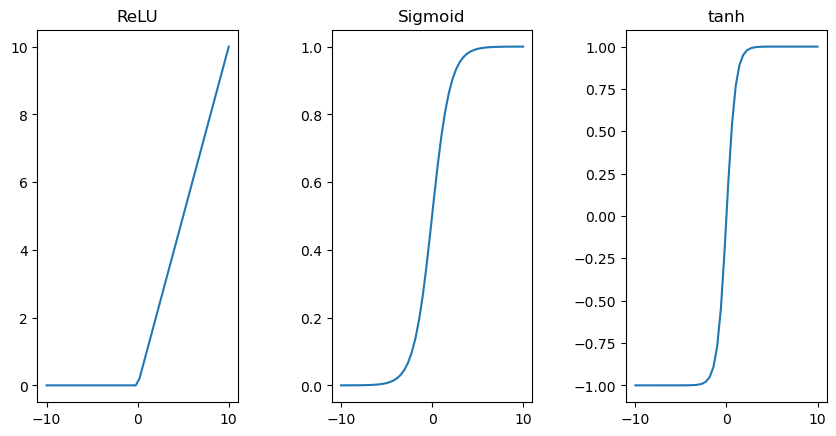

In [9]:
from matplotlib import pyplot as plt
import numpy as np
 
# rectified linear function
def rectified(x):
	return max(0.0, x)

# define input data
inputs1 = np.linspace(-10, 10, num=50) #[x for x in range(-10, 10)]
# calculate outputs
outputs1 = [rectified(x) for x in inputs1]
# plot inputs vs outputs
#plt.plot(inputs1, outputs1)
#plt.show()

# sigmoid activation function
def sigmoid(x):
	return 1.0 / (1.0 + np.exp(-x))
 
# define input data
inputs2 = np.linspace(-10, 10, num=50) #[x for x in range(-10, 10)]
# calculate outputs
outputs2 = [sigmoid(x) for x in inputs2]
# plot inputs vs outputs
#plt.plot(inputs2, outputs2)
#plt.show()

# tanh activation function
def tanh(x):
	return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
 
# define input data
inputs3 = np.linspace(-10, 10, num=50) #[x for x in range(-10, 10)]
# calculate outputs
outputs3 = [tanh(x) for x in inputs3]
# plot inputs vs outputs
#plt.plot(inputs3, outputs3)
#plt.show()

fig, axs = plt.subplots(1,3, figsize=(9,5))
axs[0].plot(inputs1, outputs1)
axs[0].set_title('ReLU')
axs[1].plot(inputs2, outputs2)
axs[1].set_title('Sigmoid')
axs[2].plot(inputs3, outputs3)
axs[2].set_title('tanh')
fig.tight_layout(pad=3.0)

The type of the activation function used for the output layer depends on the type of the problem we want to solve. 
* When predicting a numerical variable linear activation function can be used.
* In case of a classification problem 
    * with two mutually exclusive classes, we can use the sigmoid activation function for the single output of the last hidden layer,
    * with 3 or more mutually exclusive classes, the softmax (or argmax) activation function can be used,
    * with $n$ ($n \geq 2$) potentially mutually inclusive classes, the sigmoid can be applied to all $n$ outputs of the last hidden layer.

<!--
<center>
<img src="Images/ChoiceOfOutputActFc.png" width="600"> 
</center>-->

The softmax activation function $g: \mathbb{R}^n \to [0,1]^n$ is defined by 
$$g: \left(
\begin{array}{c}
x_1\\
x_2\\
\vdots\\
x_n
\end{array}\right) \mapsto \left(
\begin{array}{c}
\frac{e^{x_1}}{e^{x_1} + e^{x_2} + \cdots + e^{x_n}}\\
\frac{e^{x_2}}{e^{x_1} + e^{x_2} + \cdots + e^{x_n}}\\
\vdots\\
\frac{e^{x_n}}{e^{x_1} + e^{x_2} + \cdots + e^{x_n}}
\end{array}\right)$$

Observe that all the components of the output of $g$ are strictly positive and they sum up to $1$, so they can be interpreted as probabilities of membership of $n$ classes.

To a more detailed description about how to choose the activation functions for the hidden layers and for the output layer please visit [this site](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/).



## 3.5 The method of Lagrange multipliers

--------------

Let $f: \mathbb{R}^n \to \mathbb{R}$ and $g: \mathbb{R}^n \to \mathbb{R}$ be two functions.

**Goal:** Minimise the value $f(x)$ under the constraint $g(x) = 0$, i.e.

\begin{align*}
\left\{\begin{array}{ll}
\mbox{target function:}& f(x) \to \min\\
\mbox{constraint:}& g(x) = 0
\end{array}
\right.
\end{align*}

### 3.5.1 Developing an intuition

----------------
**Exercise**

To derive the general theory of the Lagrange multipliers method, play with the two GeoGebra applets below and find the points for which the function $f$ attains its minimum under the constraint $g = 0$. 

* In the first applet on the left hand side the formulas of the target function $f$ and of $g$ (describing the constraint) are explicitely provided. The function $f$ is plotted by its concentric contour lines. The set of points satisfying the constraint is a parabola in this case, its graph is plotted in blue. You can move the blue point on the parabola. The contour line, on which the point is situated, is plotted in red and the value of the target function reached on this line is also provided. The current (x_0,y_0)-coordinates of the blue point are indicated in red on the left.

The solution of the first constrained optimisation problem: ... <!-- $(x,y) = (-0.5,-2.12)$ and $(0.5, -2.12)$.-->

* Figure out how should we use the second app to solve the constrained minimisation problem on the surface given by its contour lines under the constraint given by the blue circle.

The solution of the second constrained optimisation problem is: ... <!-- $(x,y) = (0,-3)$, $(-2.82843, 1)$ and $(2.82843, 1)$. -->

Do you observe something interesting about the solutions? Do they have something in common? ...<!--
The gradient to the surface and the gradient to the constraint curve are parallel to each other.-->

In [ ]:
from IPython.display import IFrame

IFrame("https://www.geogebra.org/classic/vbbkutmc", 1100, 600)

In [ ]:
IFrame("https://www.geogebra.org/classic/kr3vzrvm", 1100, 700)

### 3.5.2 Formalising the method of Lagrange multipliers

The behaviour that we have observed for the two particular examples can be generalised. For any extremum point $x$ of $f$ under the constraint $g = 0$ it holds that their gradients should be alined, i.e. there exists a coefficient $\lambda \in \mathbb{R}$ such that

\begin{align}
    \nabla f(x) = \lambda \nabla g(x) \quad \quad (1)
\end{align}

Of course the point $x$, that we are looking for, should also satisfy the constraint equation 

$$g(x) = 0 \quad \quad \quad \quad \ \ \  \ (2)$$

Let us define the Lagrangian function $\mathcal{L}: \mathbb{R}^n \times \mathbb{R}$ by 
$$\mathcal{L}(x,\lambda) = f(x) - \lambda g(x)$$

The gradient of the Lagrangian is

$$\nabla \mathcal{L}(x,\lambda) = \nabla \mathcal{L}(\overbrace{x_1, x_2, \ldots, x_n}^{x},\lambda) = \Big(\overbrace{\frac{\partial \mathcal{L}}{\partial x_1}, \frac{\partial \mathcal{L}}{\partial x_2}, \ldots, \frac{\partial \mathcal{L}}{\partial x_n}}^{\nabla_x \mathcal{L}}, \frac{\partial \mathcal{L}}{\partial \lambda} \Big) = \Big(\overbrace{\frac{\partial(f-\lambda g)}{\partial x_1}, \frac{\partial(f-\lambda g)}{\partial x_2}, \ldots, \frac{\partial(f-\lambda g)}{\partial x_n}}^{\quad \quad \quad \nabla(f-\lambda g)\ =\ \nabla f - \lambda \nabla g}, -g \Big)$$

Thus equations (1) and (2) are equivalent to

$$\nabla \mathcal{L}(x, \lambda) = 0$$

Our goal was to find the solutions of the constrained optimisation problem. We have managed to conclude that all the solutions should satisfy $\nabla \mathcal{L}(x, \lambda) = 0$, i.e. they should be stationary points of the associated Lagrangian $\mathcal{L}(x,\lambda) = f(x) - \lambda g(x)$. 

The method of Lagrange multipliers for solving constrained optimisation problems formulated in two steps:
* find the candidates, i.e. the stationary points of the Lagrangian,
* check for which of them is the value of the target function optimal.

-----------------

### 3.5.3 Visual summary for the method of Lagrange multipliers
Let $f, g: \mathbb{R}^n \to \mathbb{R}$ be two differentiable functions.

For a fixed $\lambda \in \mathbb{R}$ we defined the Lagrangian $\mathcal{L}: \mathbb{R}^n \times \mathbb{R} \to \mathbb{R}$ as 

$$\mathcal{L}(x, \lambda) = f(x) - \lambda g(x)$$

**The method of Lagrange multipliers**

\begin{align*}
\left\{\begin{array}{ll}
\mbox{target function:}& f(x) \to \min\\
\mbox{constraint:}& g(x) = 0
\end{array}
\right. \quad \Rightarrow \quad 
\left\{\begin{array}{l}
\exists \lambda:  \nabla f(x) = \lambda \nabla g(x)\\
 g(x) = 0
\end{array}
\right. \quad \Leftrightarrow \quad \nabla \mathcal{L}(x,\lambda) = 0
\end{align*}

----------------
**Exercise**

Minimise the function $f(x,y) = 0.5(y-x)^2 + 0.5(1-x)^2$ under the constraint $\frac{x^2}{40^2} + \frac{y^2}{20^2} = 1$ by using the Lagrange multipliers method. You can do so, by carrying out the calculations by hand or by completing the below code with the missing functions. Check whether your solution is realistic by taking a look at the plot of the surface with its contour lines and gradients and of the curve satisfying the constraint.

In [ ]:
# Import libraries
import numpy as np
from scipy import optimize

# First we define the functions, YOU SHOULD IMPLEMENT THESE
def f(x, y):
    return 0.5*(y-x)**2 + 0.5*(1-x)**2

def g(x, y):
    return x**2/40**2 + y**2/20**2 - 1

# Next their derivatives, YOU SHOULD IMPLEMENT THESE
def dfdx(x, y):
    return -(y-x)-(1-x)

def dfdy(x, y):
    return ....

def dgdx(x, y):
    return ......

def dgdy(x, y):
    return .......

# We define the gradient of the Lagrangian function.
def DL(xyλ):
    [x, y, λ] = xyλ
    return np.array([
            dfdx(x, y) - λ * dgdx(x, y),
            dfdy(x, y) - λ * dgdy(x, y),
            - g(x, y)
        ])

# We use the optimize.root method to find the roots of the Lagrangian.

x0, y0, λ0 = (10, 10, 0)
x, y, λ = optimize.root(DL, [x0, y0, λ0]).x
print(f"x = {x:.3f}")
print(f"y = {y:.3f}")
print(f"λ = {λ:.3f}")
print(f"f(x, y) = {f(x,y):.3f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

feature_x = np.arange(-50, 50, 4)
feature_y = np.arange(-50, 50, 4)

x, y = np.meshgrid(feature_x, feature_y)
f = 0.5*(y-x)**2 + 0.5*(1-x)**2 #x**2 - y**2 #0.5*(y-x)**2 + 0.5*(1-x)**2
dfdx = 2*x - y - 1 #2*x #2*x - y - 1
dfdy = y-x #-2*y #y - x

# Normalize all gradients to focus on the direction not the magnitude
norm = np.linalg.norm(np.array((dfdx, dfdy)), axis=0)
dfdx = dfdx / norm
dfdy = dfdy / norm

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect(1)
#ax.plot(feature_x, feature_y, c='k')
ax.quiver(x, y, dfdx, dfdy, units='xy', scale=0.3, color='gray')
ax.contour(x, y, f, 15, cmap='jet')

#g_x = np.arange(-10, 10, 0.1)
#g_y = g_x**2
angle = np.arange(0, 2*np.pi, 0.1)
g_x = 40*np.cos(angle)
g_y = 20*np.sin(angle)
ax.plot(g_x,g_y, '-r')
ax.set_ylim([-50,50]);

#arrow = FancyArrowPatch((35, 35), (35+34*0.2, 35+0), arrowstyle='simple',
#                        color='r', mutation_scale=10)  
#ax.add_patch(arrow)  # NOTE: this gradient is scaled to make it better visible

--------------------

**Last remark on calculus**

Towards the end of the 17th century, beginning of the 18th century there was a big fight between Newton and Leibniz, who both started to develop and formalise the theory of calculus. You can read more about it [here](https://en.wikipedia.org/wiki/Leibniz%E2%80%93Newton_calculus_controversy).

<[ Linear Algebra ](LinearAlgebra.ipynb)|[ Statistics and PCA ](PCA.ipynb)>